In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv("/content/Industry_Surface_Roughness1  - Sheet1.csv")

In [40]:
df.head()

,"Cutting_Speed (Vc, m/min)","Feed_Rate (f, mm/rev)","Depth_of_Cut (d, mm)","Tool_Nose_Radius (rₙ, mm)","Cutting_Time (t, s)","Surface_Roughness (Ra, µm)"
0,194,0.327,0.58,0.4,67.4,2.025
1,338,0.160,1.30,0.8,66.4,1.100
2,283,0.136,1.31,1.2,82.4,1.049
3,250,0.222,1.46,1.2,58.8,1.426
4,139,0.346,1.59,0.8,81.7,2.398


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cutting_Speed (Vc, m/min)   150 non-null    int64  
 1   Feed_Rate (f, mm/rev)       150 non-null    float64
 2   Depth_of_Cut (d, mm)        150 non-null    float64
 3   Tool_Nose_Radius (rₙ, mm)   150 non-null    float64
 4   Cutting_Time (t, s)         150 non-null    float64
 5   Surface_Roughness (Ra, µm)  150 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.2 KB


In [42]:
df.describe()

,"Cutting_Speed (Vc, m/min)","Feed_Rate (f, mm/rev)","Depth_of_Cut (d, mm)","Tool_Nose_Radius (rₙ, mm)","Cutting_Time (t, s)","Surface_Roughness (Ra, µm)"
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,218.246667,0.229333,1.244067,0.736000,68.394000,1.649573
std,74.115721,0.072888,0.451812,0.331213,12.531711,0.409353
min,101.000000,0.101000,0.520000,0.400000,45.100000,0.496000
25%,153.750000,0.161750,0.872500,0.400000,59.975000,1.374500
50%,212.000000,0.239000,1.255000,0.800000,69.100000,1.616500
75%,287.500000,0.289250,1.630000,1.200000,78.200000,1.955750
max,347.000000,0.348000,1.990000,1.200000,89.900000,2.707000


In [43]:
X = df[['Cutting_Speed (Vc, m/min)','Feed_Rate (f, mm/rev)','Depth_of_Cut (d, mm)','Tool_Nose_Radius (rₙ, mm)','Cutting_Time (t, s)']]
Y = df['Surface_Roughness (Ra, µm)']

In [44]:
filter_high_feed = df[df['Feed_Rate (f, mm/rev)'] >= 0.2]

filter_speed_range = df[(df['Cutting_Speed (Vc, m/min)'] >= 150) &
 (df['Cutting_Speed (Vc, m/min)'] <= 300)]



In [45]:
df['Feed Normalized'] = (df['Feed_Rate (f, mm/rev)']-df['Feed_Rate (f, mm/rev)'].mean())/(df['Feed_Rate (f, mm/rev)'].std())


In [46]:
group_depth = df.groupby('Depth_of_Cut (d, mm)')['Surface_Roughness (Ra, µm)'].mean().reset_index()

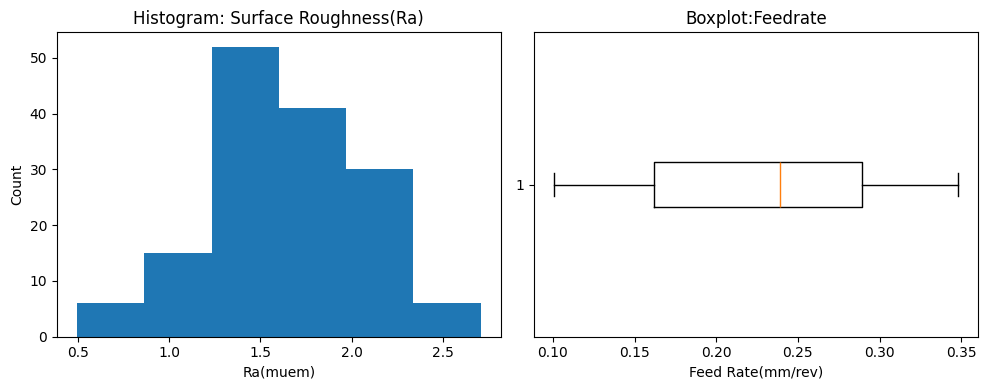

In [47]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Surface_Roughness (Ra, µm)'], bins=6)
plt.title('Histogram: Surface Roughness(Ra)')
plt.xlabel('Ra(muem)')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.boxplot(df['Feed_Rate (f, mm/rev)'], vert=False)
plt.title('Boxplot:Feedrate')
plt.xlabel('Feed Rate(mm/rev)')
plt.tight_layout()
plt.show()


In [48]:
outputs = {
    "filter_high_feed": filter_high_feed,
    "filter_speed_range": filter_speed_range,
    "feed_normalized_head": df[['Feed_Rate (f, mm/rev)','Feed Normalized']].head(),
    "group_depth": group_depth
}
outputs


{'filter_high_feed':      Cutting_Speed (Vc, m/min)  Feed_Rate (f, mm/rev)  Depth_of_Cut (d, mm)  \
 0                          194                  0.327                  0.58   
 3                          250                  0.222                  1.46   
 4                          139                  0.346                  1.59   
 6                          115                  0.268                  1.27   
 7                          317                  0.290                  0.98   
 ..                         ...                    ...                   ...   
 139                        343                  0.248                  0.62   
 142                        224                  0.306                  1.06   
 145                        109                  0.231                  1.92   
 146                        252                  0.292                  1.98   
 148                        113                  0.256                  1.06   
 
      Tool_Nose_Ra

In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [50]:
def compute_vif(X):
  vif_data = pd.DataFrame()
  vif_data['Variables']=X.columns
  vif_data["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
  return vif_data


In [51]:
print("Intial values of VIF:")
print(compute_vif(X))

Intial values of VIF:
                   Variables        VIF
0  Cutting_Speed (Vc, m/min)   8.280254
1      Feed_Rate (f, mm/rev)   8.549576
2       Depth_of_Cut (d, mm)   7.279921
3  Tool_Nose_Radius (rₙ, mm)   6.070630
4        Cutting_Time (t, s)  15.952483


In [52]:
X_reduced = X.drop(columns=['Cutting_Speed (Vc, m/min)'])

In [53]:
Xc = sm.add_constant(X_reduced) #added 1's column here
model_reduced = sm.OLS(Y,Xc).fit() #using OLS best fit line for regression model

In [54]:
print("OLS regression summary ")
print(model_reduced.summary())

OLS regression summary 
                                OLS Regression Results                                
Dep. Variable:     Surface_Roughness (Ra, µm)   R-squared:                       0.848
Model:                                    OLS   Adj. R-squared:                  0.843
Method:                         Least Squares   F-statistic:                     201.7
Date:                        Tue, 04 Nov 2025   Prob (F-statistic):           3.56e-58
Time:                                19:12:45   Log-Likelihood:                 62.756
No. Observations:                         150   AIC:                            -115.5
Df Residuals:                             145   BIC:                            -100.5
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [56]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [57]:
print("Intercept: " , model.intercept_)
print("Coeff:")
for col, coef in zip(X.columns, model.coef_):
 print(f"{col}: {coef:.4f}")

Intercept:  0.851524928177189
Coeff:
Cutting_Speed (Vc, m/min): -0.0020
Feed_Rate (f, mm/rev): 4.5026
Depth_of_Cut (d, mm): 0.3359
Tool_Nose_Radius (rₙ, mm): -0.2565
Cutting_Time (t, s): -0.0003


In [58]:
y_pred = model.predict(X)

In [59]:
r2 = r2_score(Y,y_pred)
rmse = np.sqrt(mean_squared_error(Y,y_pred))

In [60]:
n = len(Y)
k = X.shape[1]
adj_r2 = 1 - (1- r2) * (n-1)/(n-k-1)


In [61]:
print("\nModel Performance :")
print(f"r2 = {r2:.4f}")
print(f"rmse = {rmse:.4f}")
print(f"r2_adjusted = {adj_r2:.4f}")



Model Performance :
r2 = 0.9803
rmse = 0.0573
r2_adjusted = 0.9796


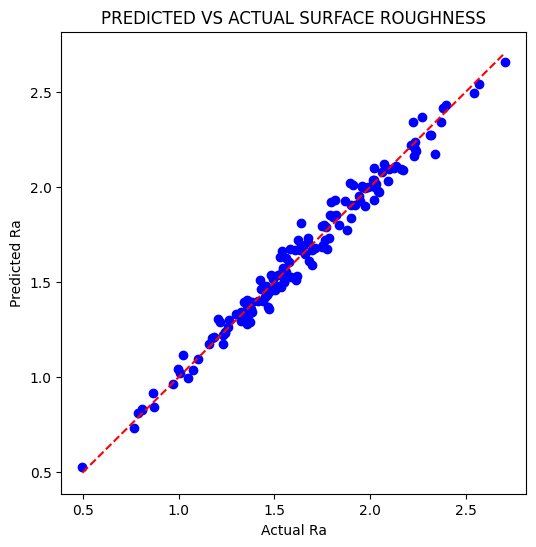

In [62]:
plt.figure(figsize=(6,6))
plt.scatter(Y,y_pred, color="blue")
plt.plot([Y.min(),Y.max()], [Y.min(),Y.max()], "r--")
plt.xlabel("Actual Ra")
plt.ylabel("Predicted Ra")
plt.title("PREDICTED VS ACTUAL SURFACE ROUGHNESS")
plt.show()

